### Saleha Iftikhar - B

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [7]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

data = pd.read_csv('titanic.csv')
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [131]:
# Unique Passengers
passenger_count = data['PassengerId'].nunique()
print("Unique Passengers: ", passenger_count)

# Perctentage Male
gender_counts = data['Sex'].value_counts()
male_count = gender_counts[1]  
male_percentage = (male_count / passenger_count) * 100
print("Male Percentage: ",male_percentage )

# Percentage Survived
survival_values = data['Survived']
survival_percentage = survival_values.mean() * 100
print("Survived Percentage: ", survival_percentage)


Unique Passengers:  891
Male Percentage:  64.75869809203144
Survived Percentage:  38.38383838383838


# Your written answer:

 - Unique Passengers: 891
 - Perctentage Male: 64.75%
 - Percentage Survived: 38.3%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [133]:
# Percentage of Female Passengers Who Survived
female_data = data[data['Sex'] == 0]  
female_survival_percentage = female_data['Survived'].mean() * 100
print("Female Survival Percentage: ", female_survival_percentage)

# Percentage of Male Passengers Who Survived
male_data = data[data['Sex'] == 1]  
male_survival_percentage = male_data['Survived'].mean() * 100
print("Male Survival Percentage: ", male_survival_percentage)

Female Survival Percentage:  74.20382165605095
Male Survival Percentage:  18.890814558058924


Your written answer:

 - Female Survival Percentage:  74.2
 - Male Survival Percentage:  18.9

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [136]:
# Grouping by 'Pclass' to find total ticket count and survival rate for each class
ticket_class_data = data.groupby('Pclass').agg(
    ticket_count=('PassengerId', 'count'),  # Total tickets 
    survival_rate=('Survived', 'mean')      # Survival rate 
)

# Calculate the percentage of total tickets
total_tickets = ticket_class_data['ticket_count'].sum()
ticket_class_data['ticket_percentage'] = (ticket_class_data['ticket_count'] / total_tickets) * 100

ticket_class_data['survival_rate'] *= 100

print(ticket_class_data[['ticket_percentage', 'survival_rate']])


        ticket_percentage  survival_rate
Pclass                                  
1               24.242424      62.962963
2               20.650954      47.282609
3               55.106622      24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.2%
    - % survivorship: 62.9%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.1%
    - % survivorship: 24.2%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

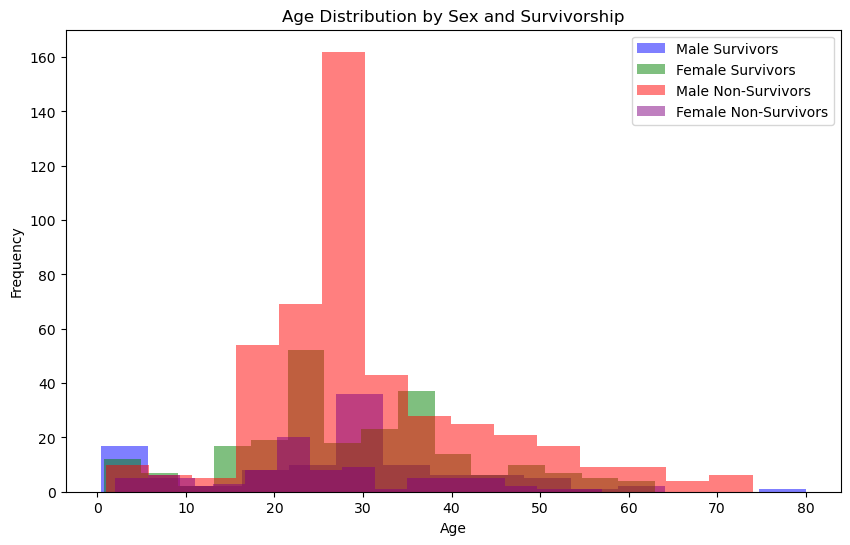

In [148]:
# Creating dataframes for survivors and non-survivors 
survivors_df = data[data['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = data[data['Survived'] == 0][['Age', 'Name', 'Sex']]

# Ploting the distribution of age by sex and survivorship - each histogram
plt.figure(figsize=(10, 6))

# Ploting
plt.hist(survivors_df[survivors_df['Sex'] == 1]['Age'], bins=15, alpha=0.5, label='Male Survivors', color='blue', histtype='stepfilled')
plt.hist(survivors_df[survivors_df['Sex'] == 0]['Age'], bins=15, alpha=0.5, label='Female Survivors', color='green', histtype='stepfilled')
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 1]['Age'], bins=15, alpha=0.5, label='Male Non-Survivors', color='red', histtype='stepfilled')
plt.hist(non_survivors_df[non_survivors_df['Sex'] == 0]['Age'], bins=15, alpha=0.5, label='Female Non-Survivors', color='purple', histtype='stepfilled')

plt.title('Age Distribution by Sex and Survivorship')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [102]:
'''Your code here'''
label = ['Survived']
features = ['Sex', 'Age', 'Pclass', 'Fare', 'Family_Size'] # we want to use all the ifnormative data we can get

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[features], data[label], test_size = 0.2)


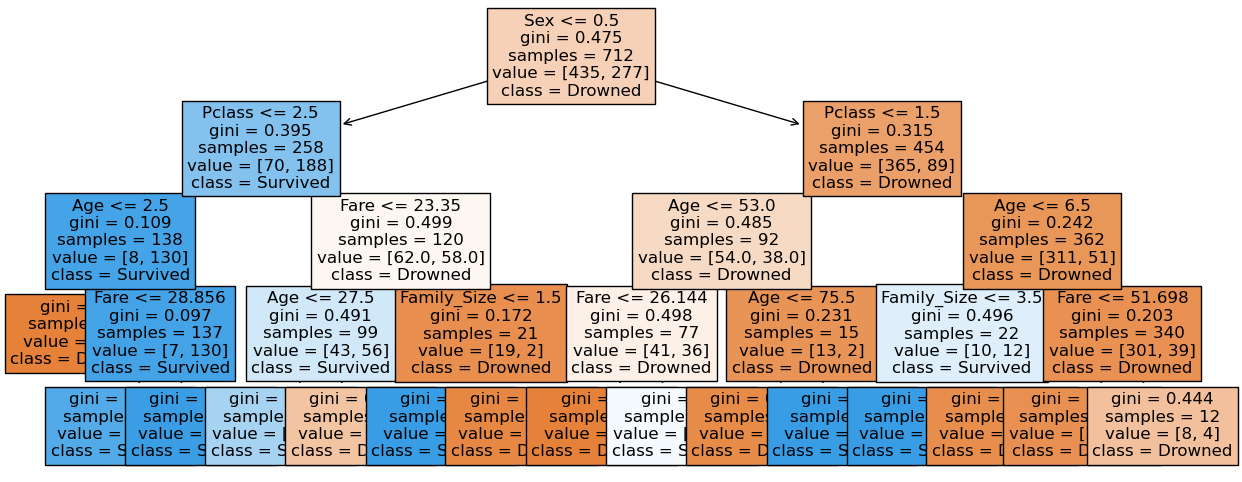

In [104]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)

tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize = (15,6))
plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
         filled = True, fontsize = 12)

plt.show()

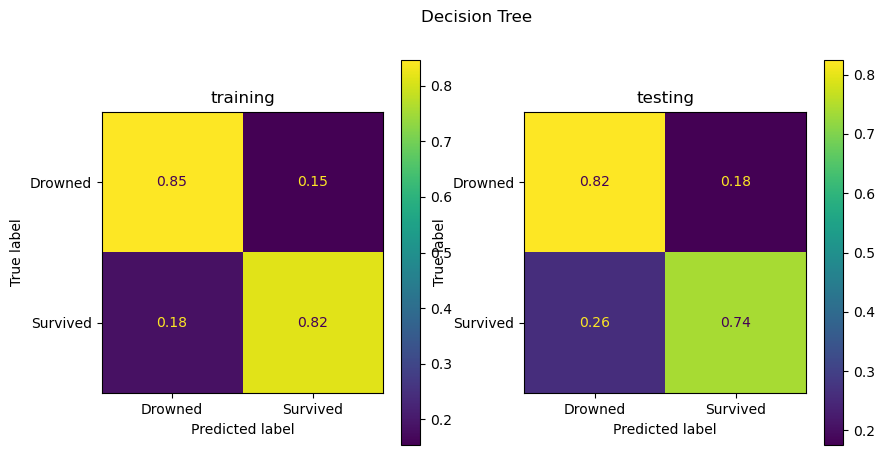

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision Tree')
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()


knn_clf = KNeighborsClassifier(n_neighbors = 15,)
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=15)

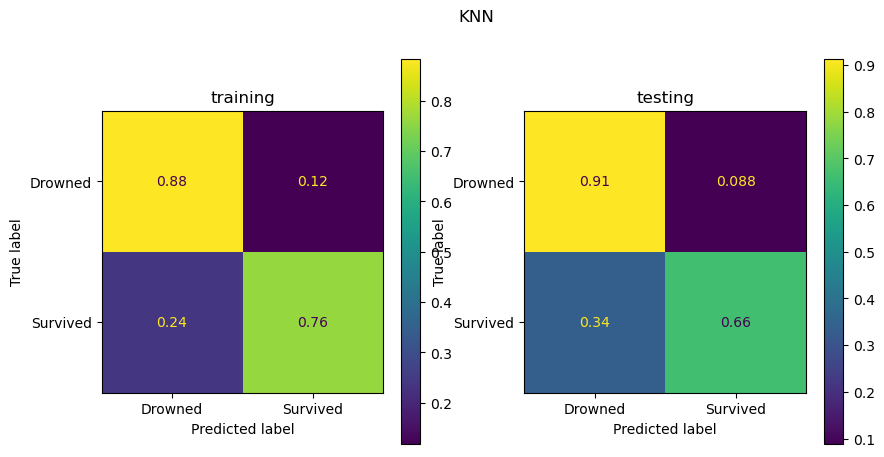

In [124]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ConfusionMatrixDisplay.from_predictions(y_train, y_knn_train, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(y_test, y_knn_test, 
                                        normalize = 'true',
                                        display_labels = ['Drowned', 'Survived'],
                                        ax = ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show()


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

For both models, the performance on the test data was a bit worse than on the training data. The Decision Tree model seemed more consistent across training and testing, while KNN did well on training but dropped more in accuracy on the test set, especially for predicting survivors. Overall, the Decision Tree felt more reliable and balanced, so it worked better than KNN here.